**Eg2**

On the Cervical Cancer Data Set, your solution should include the below.
Feature engineering
1. Model fitting and performance evaluation
2. A function that takes as arguments: a model, train data, test data and returns the model's predictions on the test data
3. All necessary visualizations.
4. A function that takes a set of predictions and true values that validates the predictions using appropriate metrics.
5. Anything else you feel is necessary for modelling or improving the performance of your model.

In [1]:
import pandas as pd
df = pd.read_csv('/content/risk_factors_cervical_cancer.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [2]:
df.shape

(858, 36)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [15]:
print(f'Column names: {df.columns.tolist()}')

Column names: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [18]:
import numpy as np
df.replace('?', np.nan, inplace=True)

In [19]:
print(df.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

can't change

In [21]:
print(df.describe(include='all'))

               Age Number of sexual partners First sexual intercourse  \
count   858.000000                       832                      851   
unique         NaN                        12                       21   
top            NaN                       2.0                     15.0   
freq           NaN                       272                      163   
mean     26.820513                       NaN                      NaN   
std       8.497948                       NaN                      NaN   
min      13.000000                       NaN                      NaN   
25%      20.000000                       NaN                      NaN   
50%      25.000000                       NaN                      NaN   
75%      32.000000                       NaN                      NaN   
max      84.000000                       NaN                      NaN   

       Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
count                 802    845            845     

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numerical_cols}')


Categorical columns: ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Numerical columns: ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [23]:
binary_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs']

# Convert binary columns to 0 and 1
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,NaN,37.0,37.0,NaN,3.0,NaN,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,NaN,0.0,0.0,NaN,15.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,NaN,0.0,0.0,NaN,8.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,NaN,0.0,0.0,NaN,0.08,NaN,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,NaN,0.0,0.0,NaN,0.08,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [24]:
df.fillna(0, inplace=True)

In [25]:
df.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [ ]:
#1. Model fitting and performance evaluation

In [71]:
cancer_data = df

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

In [64]:
def train_knn(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("KNN Accuracy:", accuracy)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [65]:
def train_ann(X_train, X_test, y_train, y_test):
    ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann_model.fit(X_train, y_train)
    y_pred = ann_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("ANN Accuracy:", accuracy)

    print("ANN Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("ANN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [61]:
def train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200]
    }

    xgb_model = xgb.XGBClassifier()
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Accuracy:", accuracy)

    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("XGBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [62]:
target_df = cancer_data['Biopsy']
input_df = cancer_data.drop(columns=['Biopsy'])
X = np.array(input_df).astype('float32')

y = np.array(target_df).astype('float32')

# SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

ANN Accuracy: 0.968944099378882
ANN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       179
         1.0       0.93      1.00      0.97       143

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



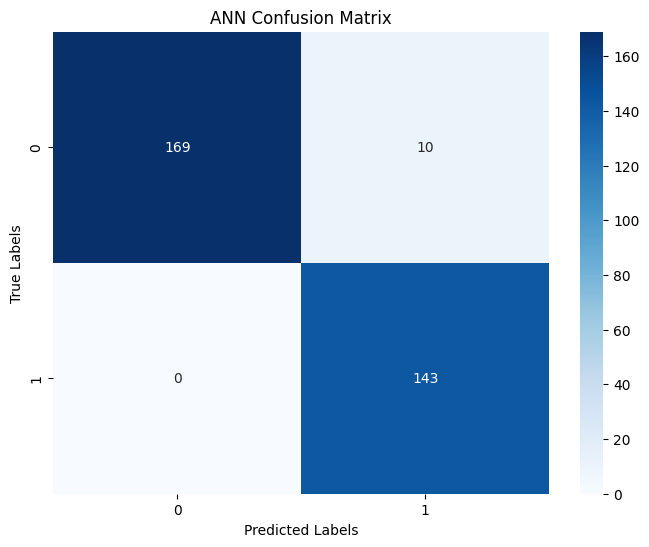

KNN Accuracy: 0.9006211180124224
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       179
         1.0       0.82      0.99      0.90       143

    accuracy                           0.90       322
   macro avg       0.91      0.91      0.90       322
weighted avg       0.91      0.90      0.90       322



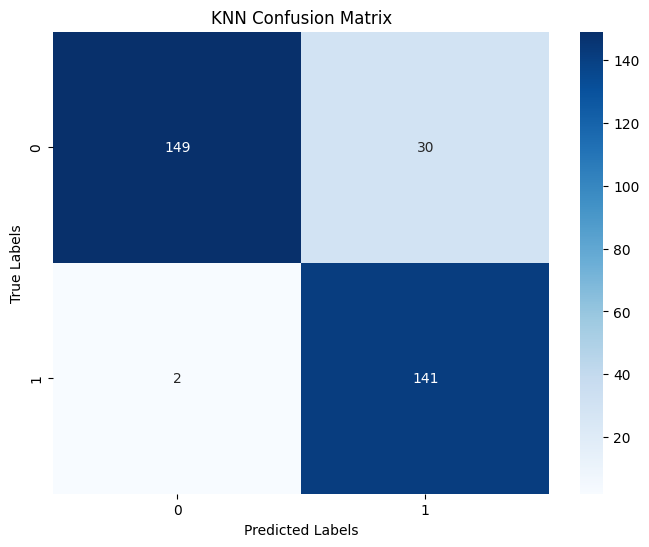

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.9828660436137072
XGBoost Accuracy: 0.9751552795031055
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       179
         1.0       0.96      0.99      0.97       143

    accuracy                           0.98       322
   macro avg       0.97      0.98      0.97       322
weighted avg       0.98      0.98      0.98       322



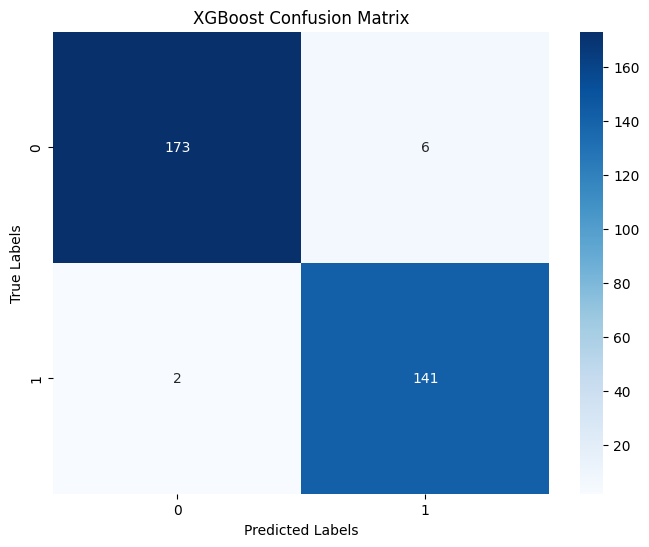

In [63]:
train_ann(X_train, X_test, y_train, y_test)
train_knn(X_train, X_test, y_train, y_test)
train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test)

In [ ]:
#2. A function that takes as arguments: a model, train data, test data and returns the model's predictions on the test data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


Model Accuracy: 0.9006

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       179
         1.0       0.82      0.99      0.90       143

    accuracy                           0.90       322
   macro avg       0.91      0.91      0.90       322
weighted avg       0.91      0.90      0.90       322



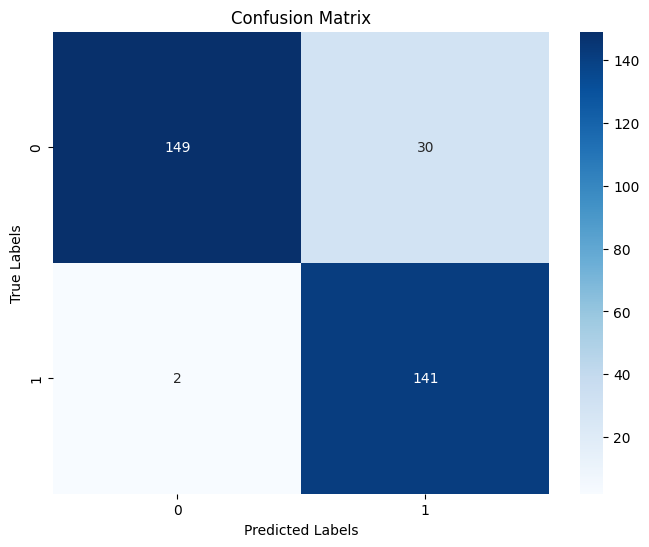

In [68]:
def train_and_predict(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

target_df = cancer_data['Biopsy']
input_df = cancer_data.drop(columns=['Biopsy'])
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

# SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
y_pred = train_and_predict(knn_model, X_train, X_test, y_train)
evaluate_model(y_test, y_pred)

In [69]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

SVC Accuracy: 0.9565217391304348
SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       179
         1.0       0.94      0.97      0.95       143

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



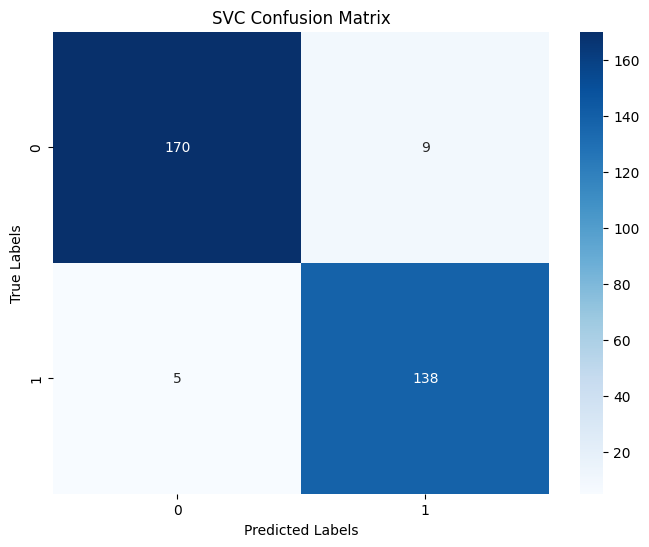

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

class CervicalCancerModel:
    def __init__(self, df):
        self.df = df
        self.df.replace("?", np.nan, inplace=True)
        self.df = self.df.dropna()

    def preprocess_data(self):
        target_df = self.df['Biopsy'].astype('float32')
        input_df = self.df.drop(columns=['Biopsy']).astype('float32')
        X = np.array(input_df)
        y = np.array(target_df)

        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    def train_and_evaluate(self, model, X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model.__class__.__name__} Accuracy:", accuracy)

        print(f"{model.__class__.__name__} Classification Report:")
        print(classification_report(y_test, y_pred))
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{model.__class__.__name__} Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        return y_pred


cancer_data = df
cervical_cancer_model = CervicalCancerModel(cancer_data)
X_train, X_test, y_train, y_test = cervical_cancer_model.preprocess_data()

svm_model = SVC(kernel='linear', random_state=42)
svm_predictions = cervical_cancer_model.train_and_evaluate(svm_model, X_train, X_test, y_train, y_test)

In [ ]:
#3. All necessary visualizations.

In [26]:
cancer_data = df

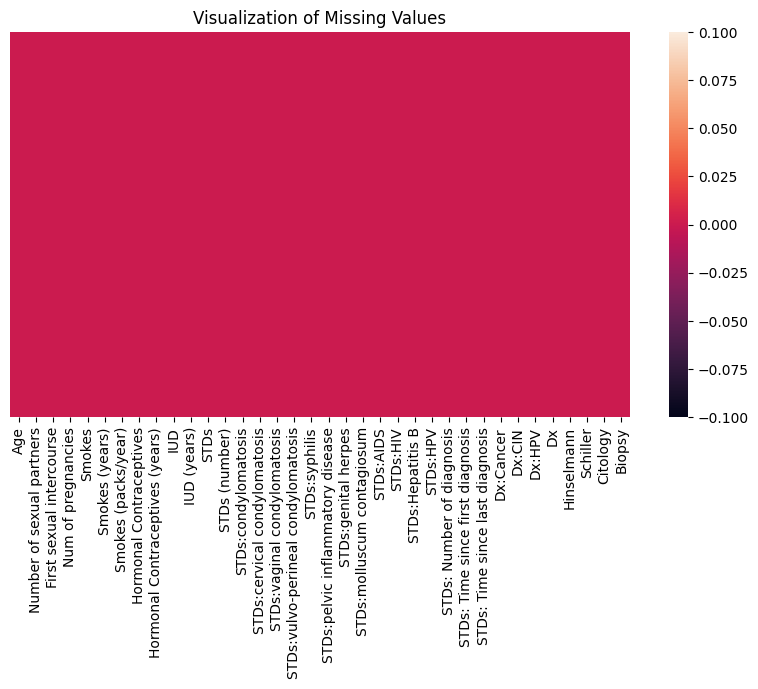

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels= False)
plt.title("Visualization of Missing Values")
plt.show()

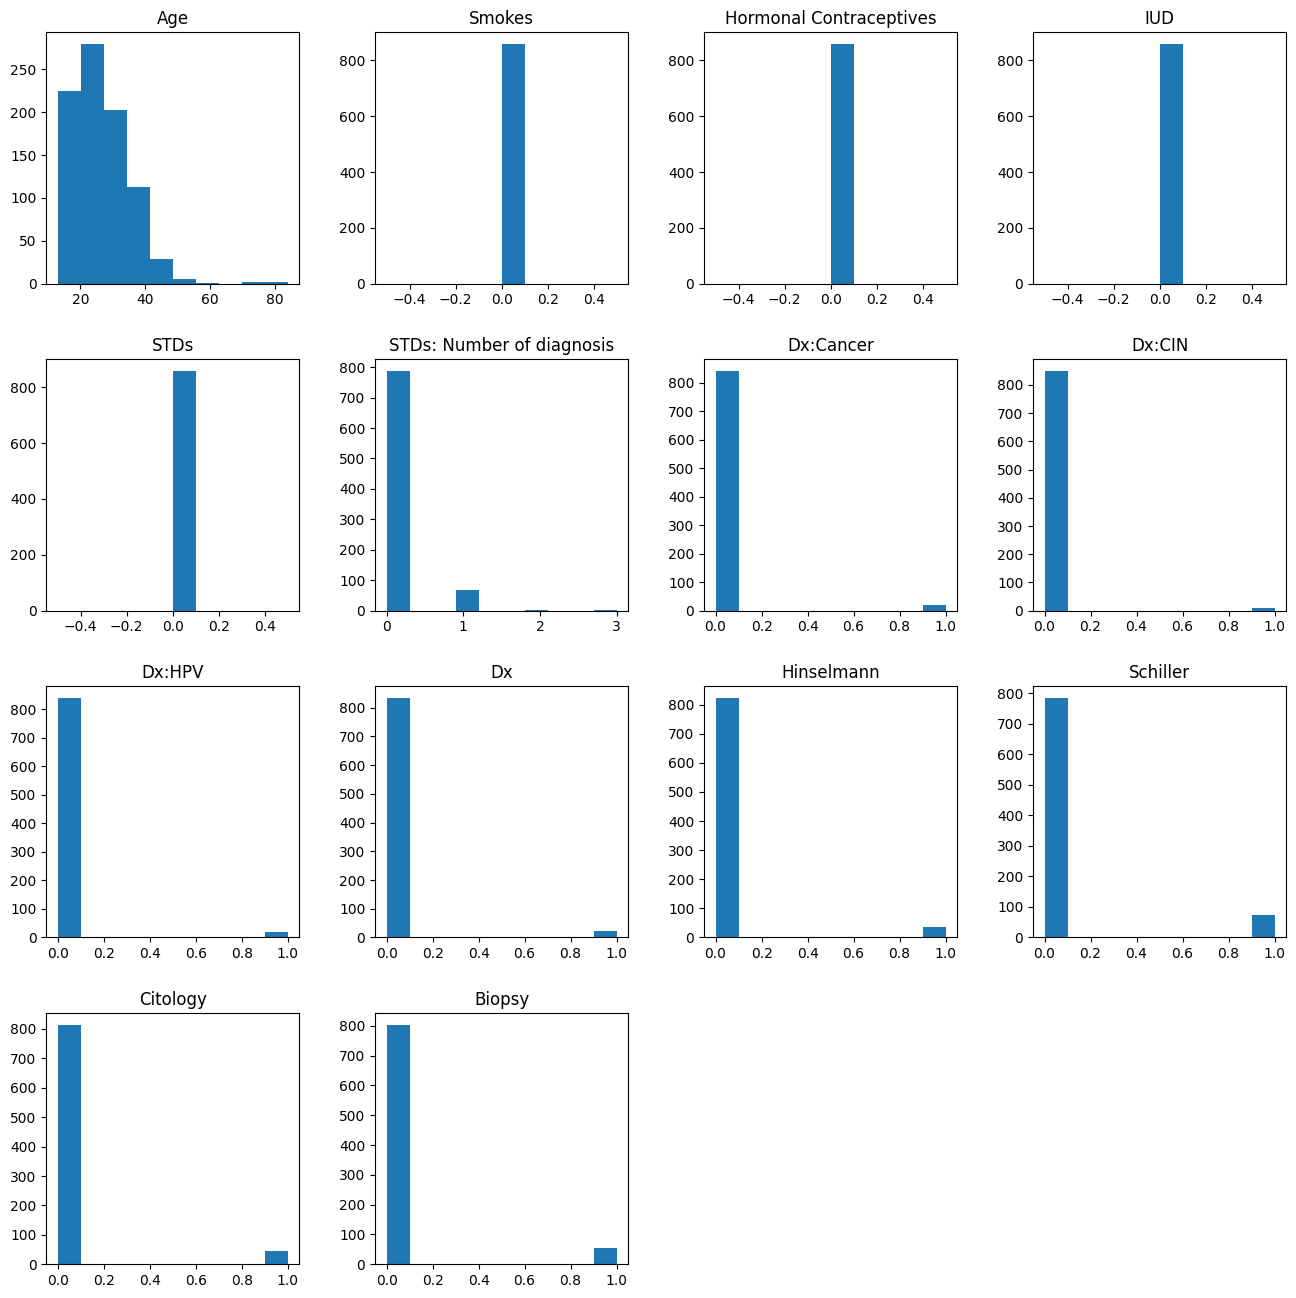

In [28]:
cancer_data.hist(grid=False,
             figsize=(16,16))

plt.show()


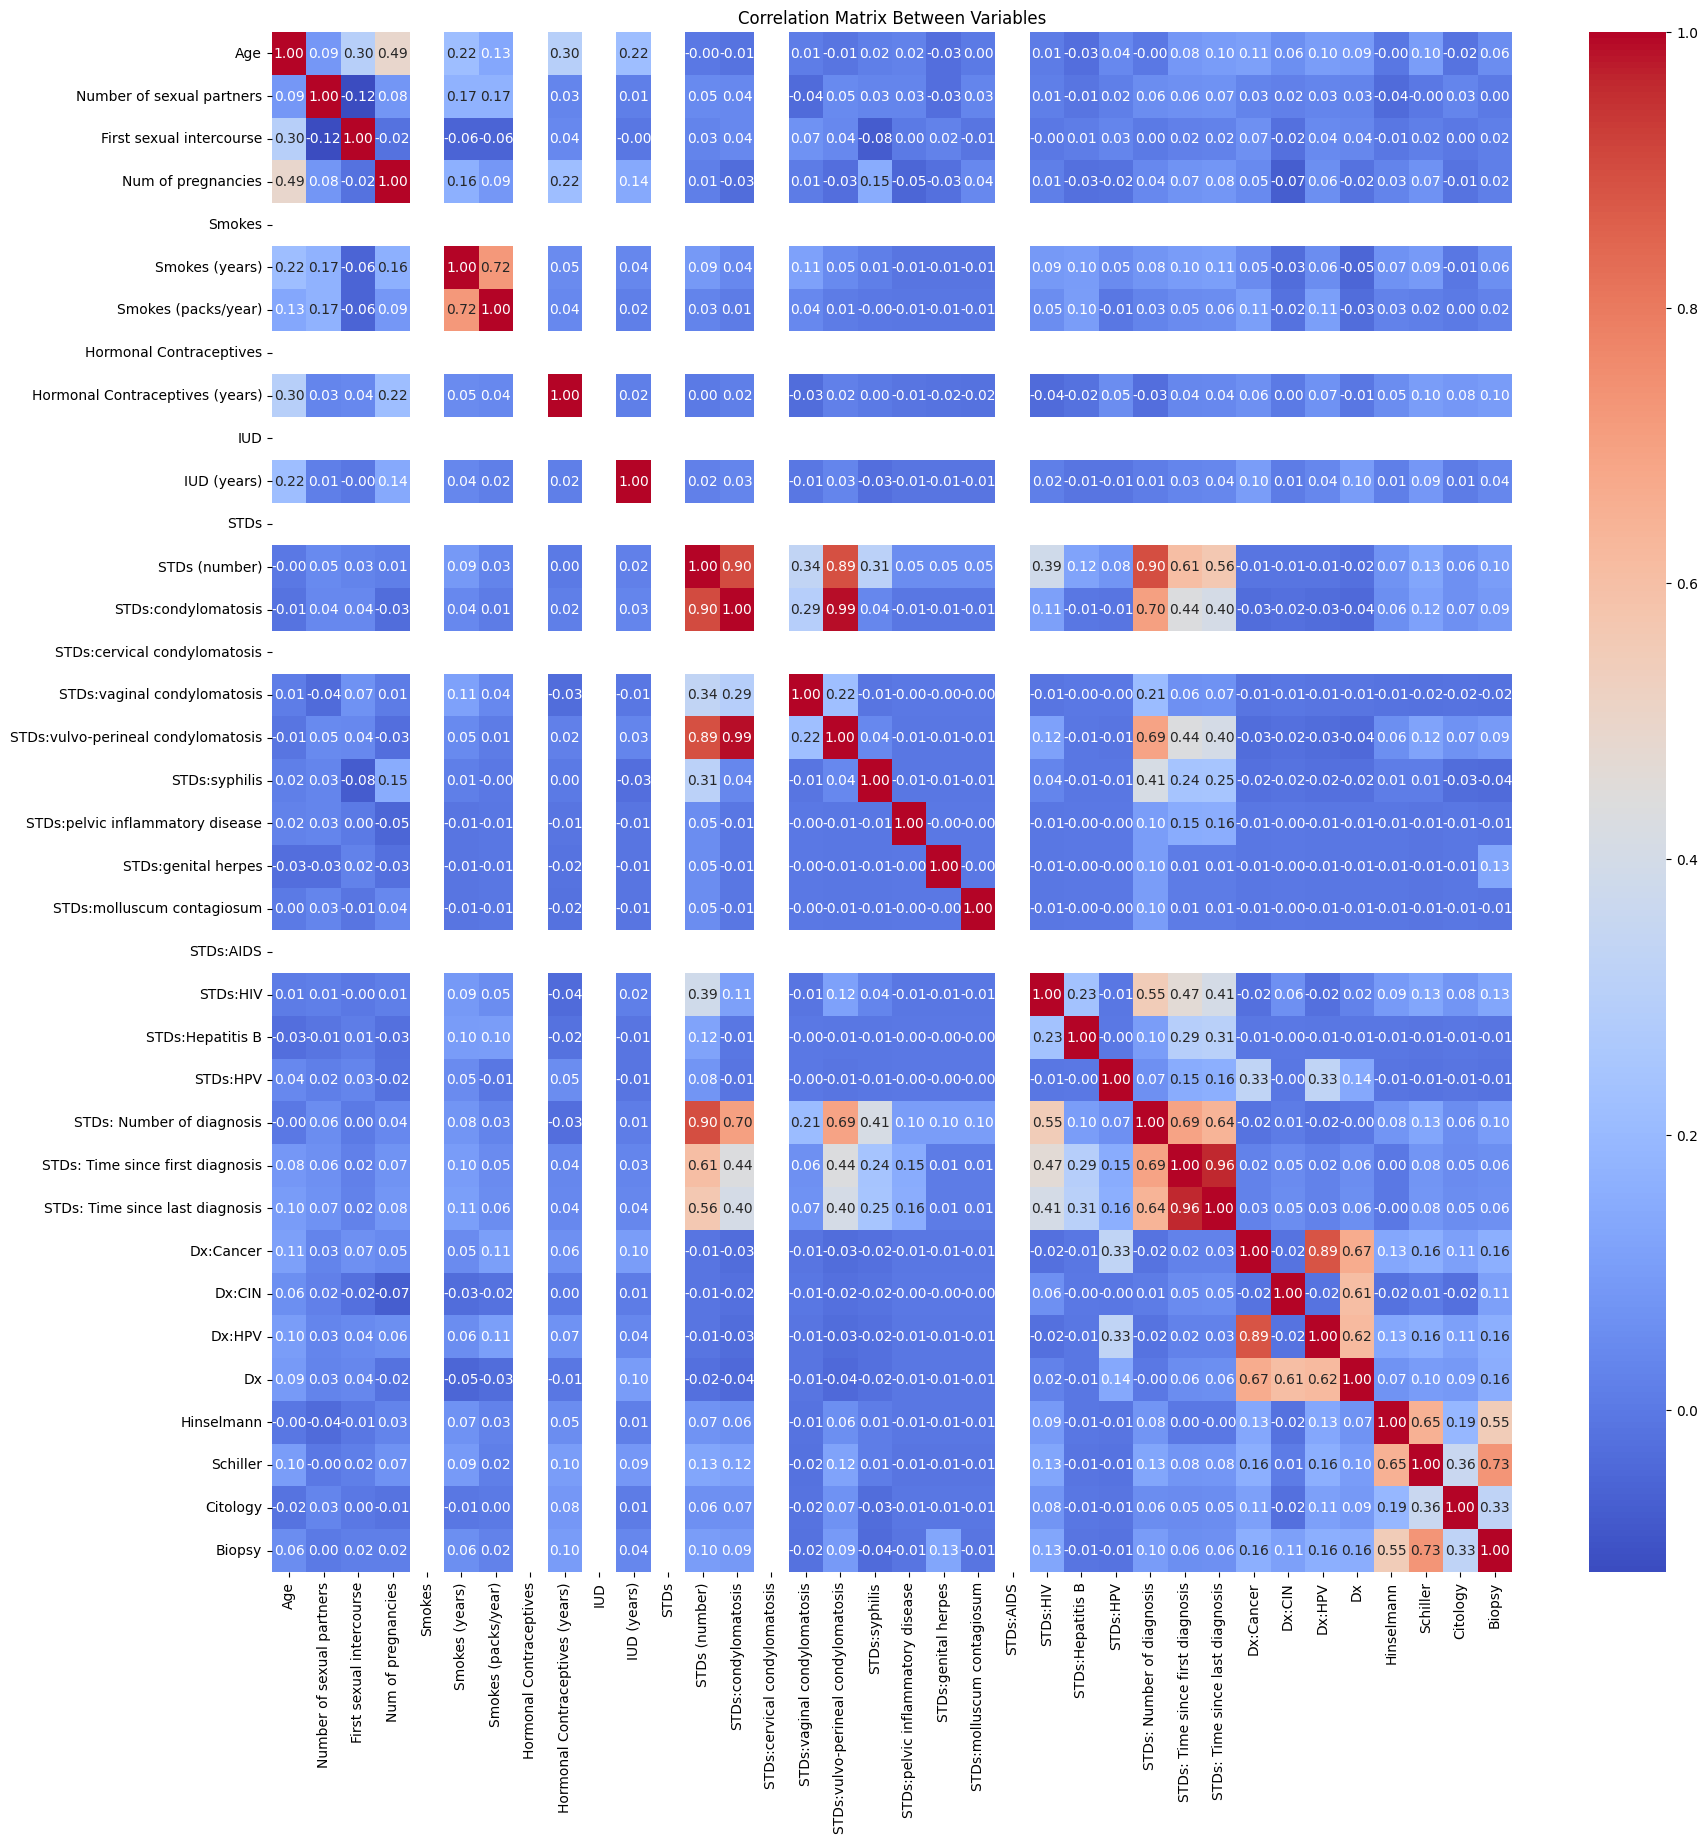

In [34]:
correlation_matrix = cancer_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Variables")
plt.show()

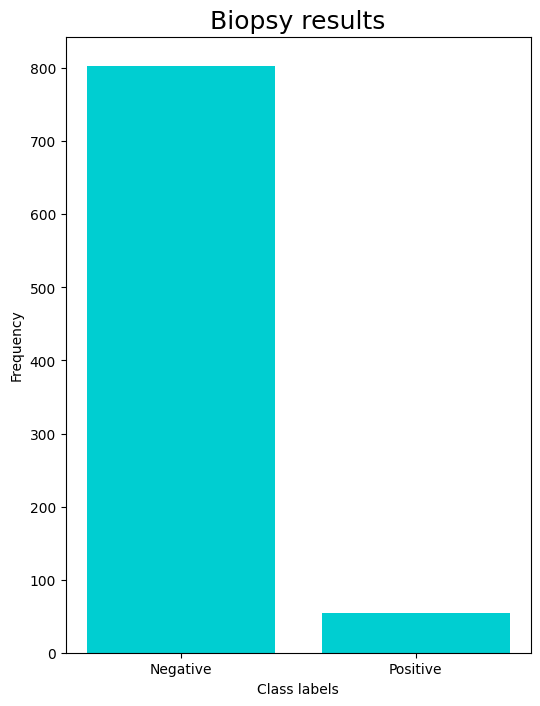

In [35]:
plt.figure(figsize = (6, 8))
plt.title('Biopsy results', fontsize = 18)
plt.bar(['Negative', 'Positive'], [803,55], color = 'darkturquoise')
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()

In [38]:
biopsy_positive = cancer_data[cancer_data['Biopsy'] == 1]
biopsy_negative = cancer_data[cancer_data['Biopsy'] == 0]


biopsy_positive_summary = biopsy_positive.describe()
print(biopsy_positive_summary)

             Age  Smokes  Hormonal Contraceptives   IUD  STDs  \
count  55.000000    55.0                     55.0  55.0  55.0   
mean   28.636364     0.0                      0.0   0.0   0.0   
std     8.884784     0.0                      0.0   0.0   0.0   
min    16.000000     0.0                      0.0   0.0   0.0   
25%    21.000000     0.0                      0.0   0.0   0.0   
50%    28.000000     0.0                      0.0   0.0   0.0   
75%    34.500000     0.0                      0.0   0.0   0.0   
max    52.000000     0.0                      0.0   0.0   0.0   

       STDs: Number of diagnosis  Dx:Cancer     Dx:CIN     Dx:HPV         Dx  \
count                  55.000000  55.000000  55.000000  55.000000  55.000000   
mean                    0.200000   0.109091   0.054545   0.109091   0.127273   
std                     0.403687   0.314627   0.229184   0.314627   0.336350   
min                     0.000000   0.000000   0.000000   0.000000   0.000000   
25%           

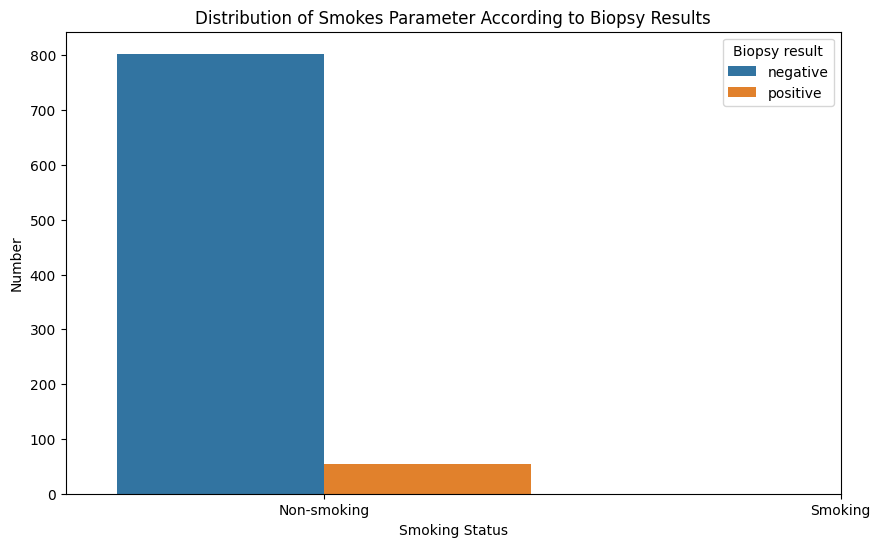

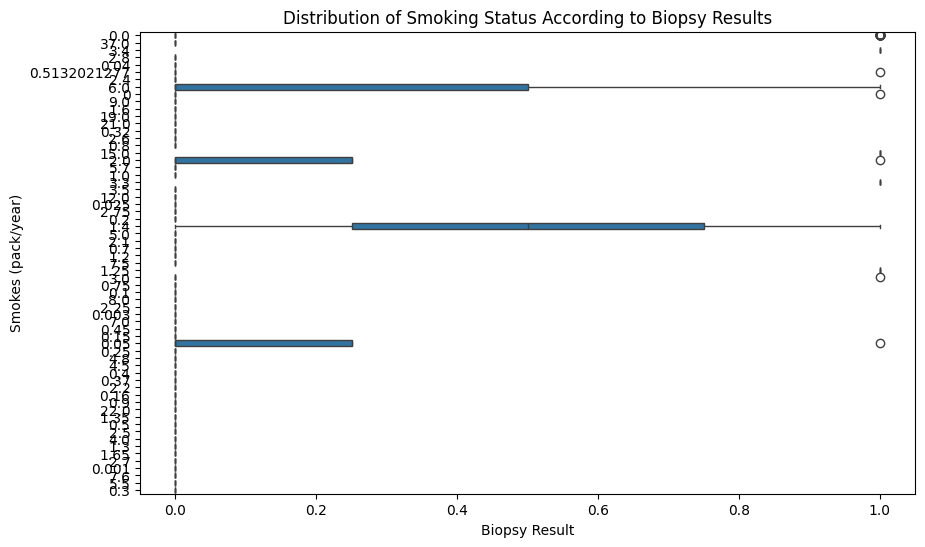

Smoking Status Statistics of the Group with Positive Biopsy Result:
count      55
unique     12
top       0.0
freq       44
Name: Smokes (packs/year), dtype: object

Biopsy Result Negative Group Smoking Status Statistics:
count     803
unique     59
top       0.0
freq      678
Name: Smokes (packs/year), dtype: object


In [39]:
# Smokes parameter distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Smokes', hue='Biopsy', data=cancer_data)
plt.title('Distribution of Smokes Parameter According to Biopsy Results')
plt.xlabel('Smoking Status')
plt.ylabel('Number')
plt.xticks([0, 1], ['Non-smoking', 'Smoking'])
plt.legend(title='Biopsy result', labels=['negative', 'positive'])
plt.show()

# Visualization of the relationship between the Smokes parameter and the biopsy result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Biopsy', y='Smokes (packs/year)', data=cancer_data)
plt.title('Distribution of Smoking Status According to Biopsy Results')
plt.xlabel('Biopsy Result')
plt.ylabel('Smokes (pack/year)')
plt.show()

# Smokes parameter statistical summaries of groups with positive and negative biopsy results
biopsy_positive_smokes_summary = biopsy_positive['Smokes (packs/year)'].describe()
biopsy_negative_smokes_summary = biopsy_negative['Smokes (packs/year)'].describe()

print("Smoking Status Statistics of the Group with Positive Biopsy Result:")
print(biopsy_positive_smokes_summary)
print("\nBiopsy Result Negative Group Smoking Status Statistics:")
print(biopsy_negative_smokes_summary)

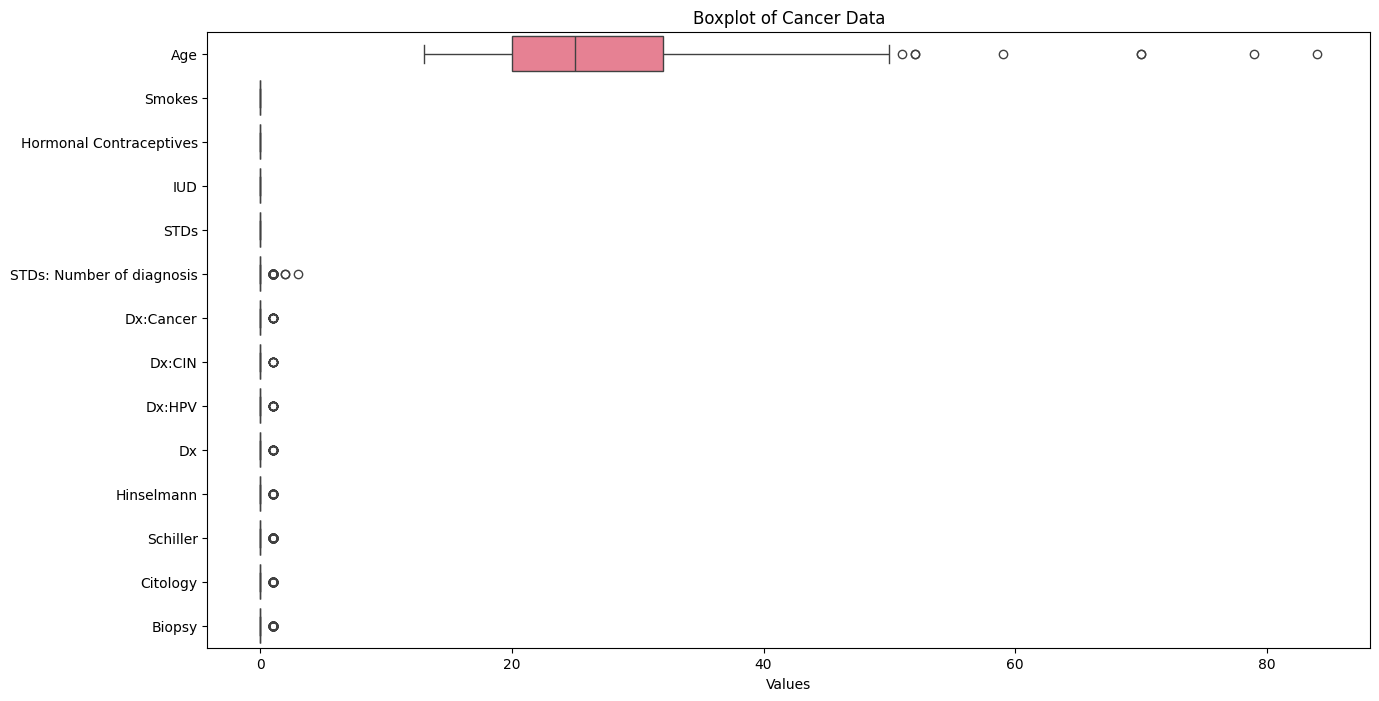

In [45]:
#Let's check for outliers with #box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cancer_data, orient="h")
plt.title("Boxplot of Cancer Data")
plt.xlabel("Values")
plt.show()

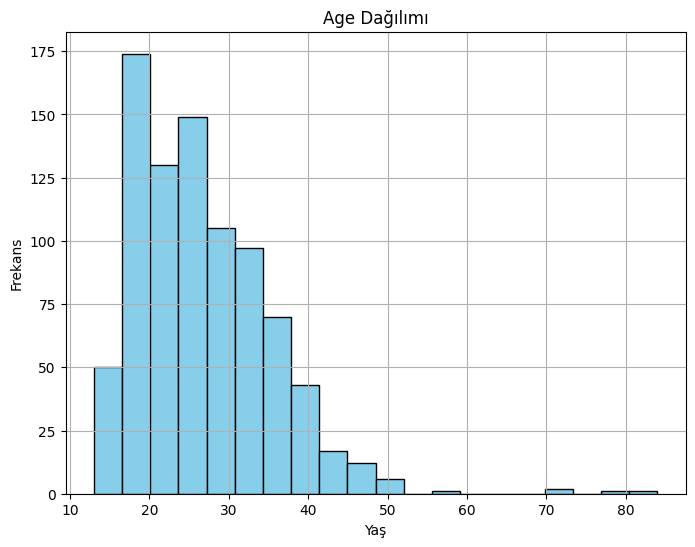

In [46]:
# Plot the histogram of the Age variable and take a closer look
plt.figure(figsize=(8, 6))
plt.hist(cancer_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

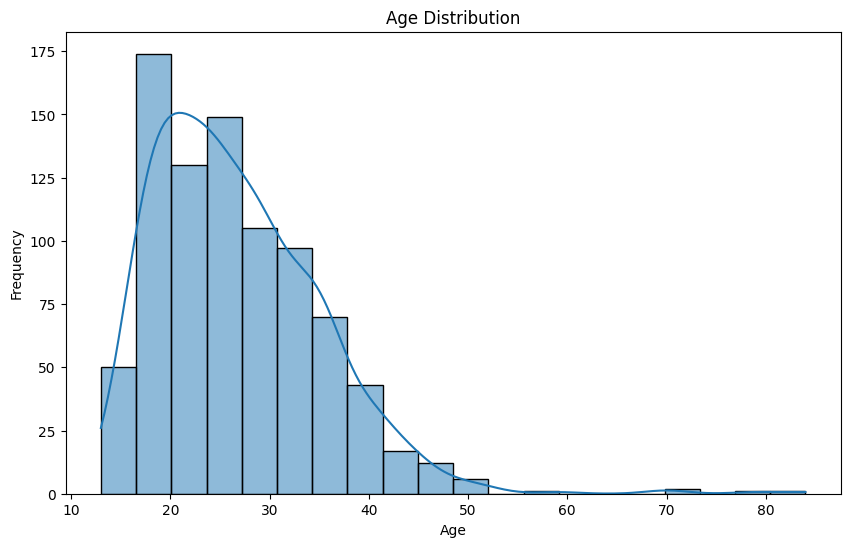

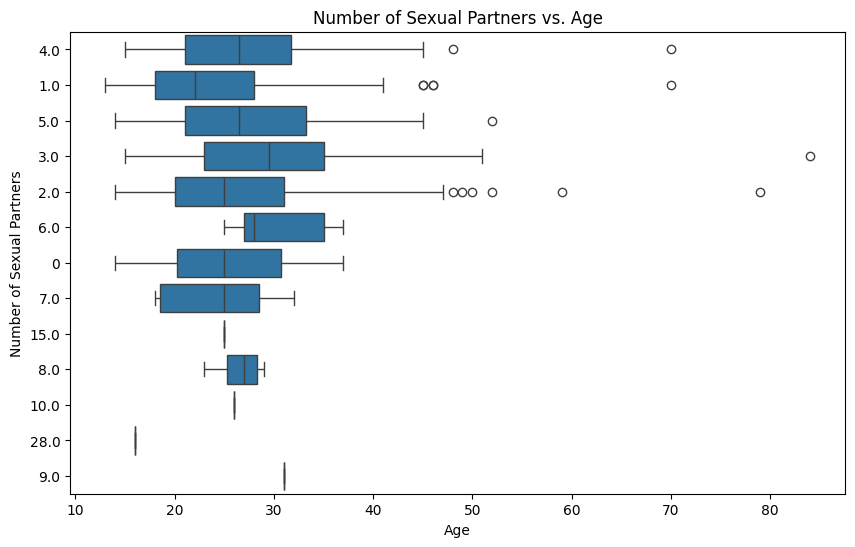

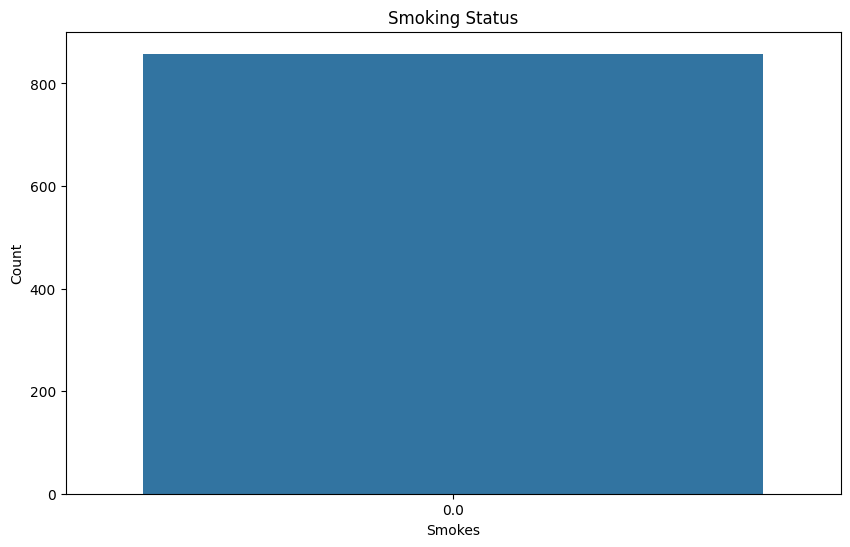

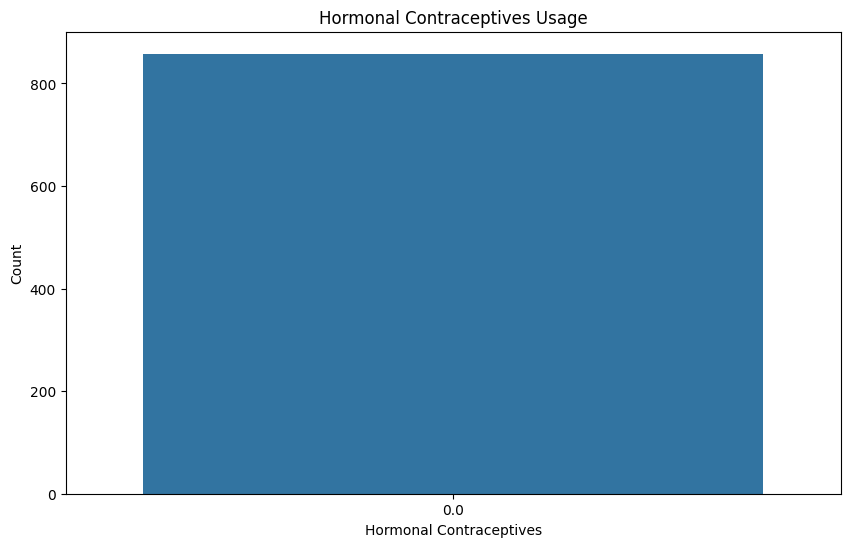

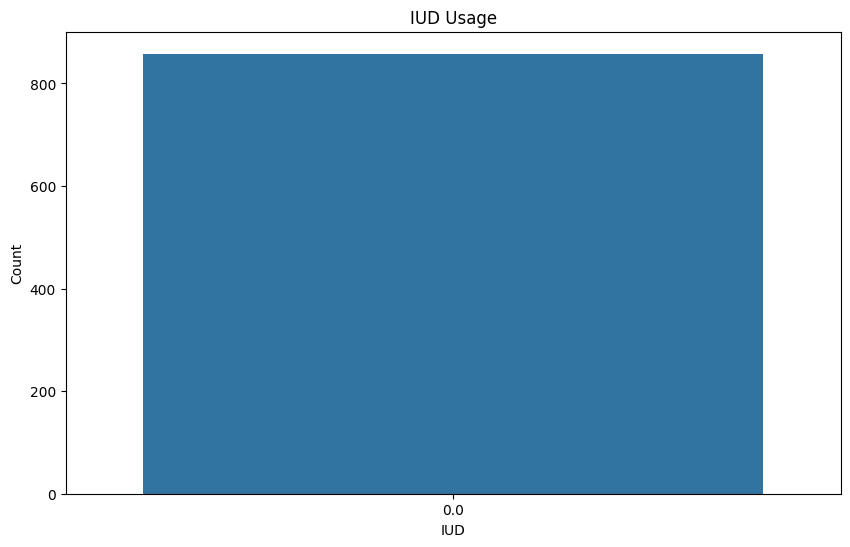

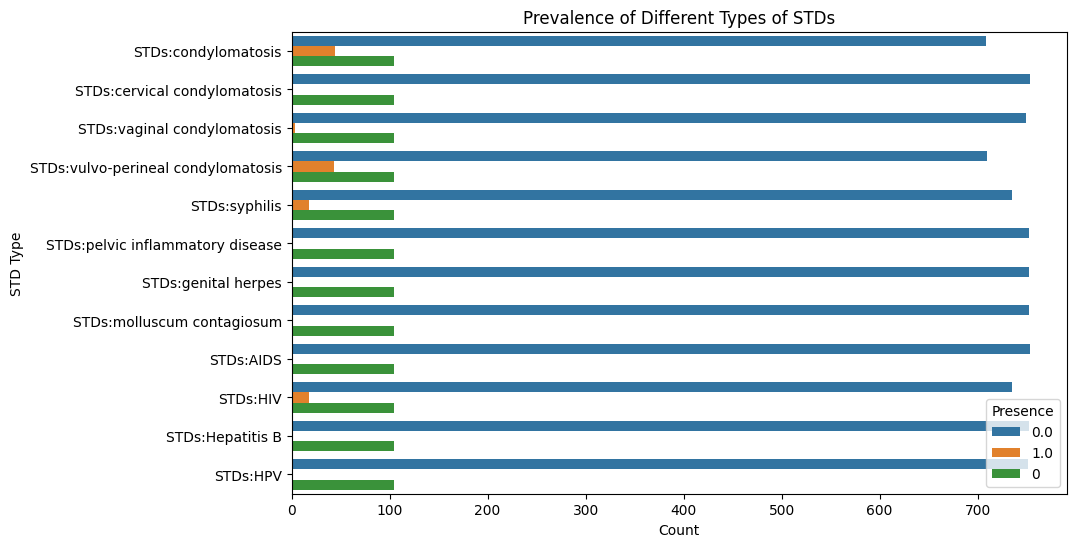

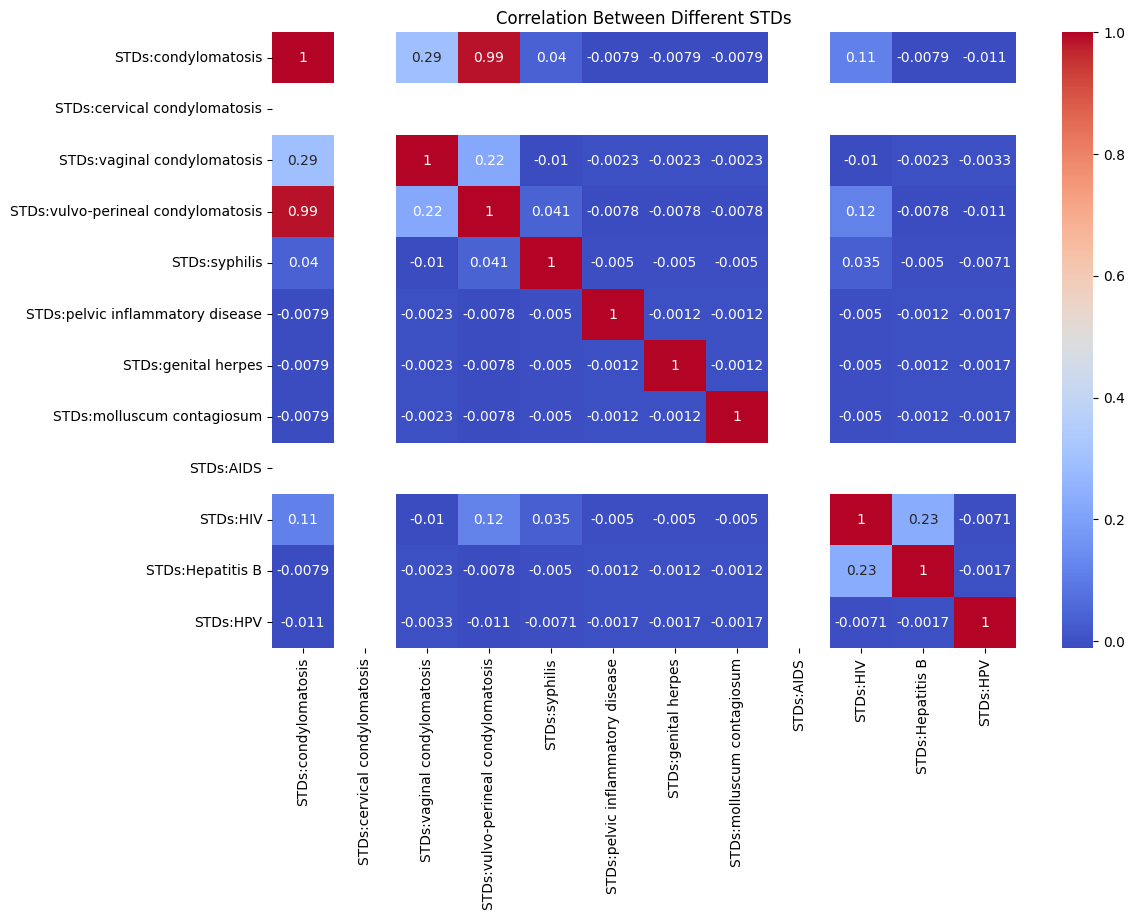

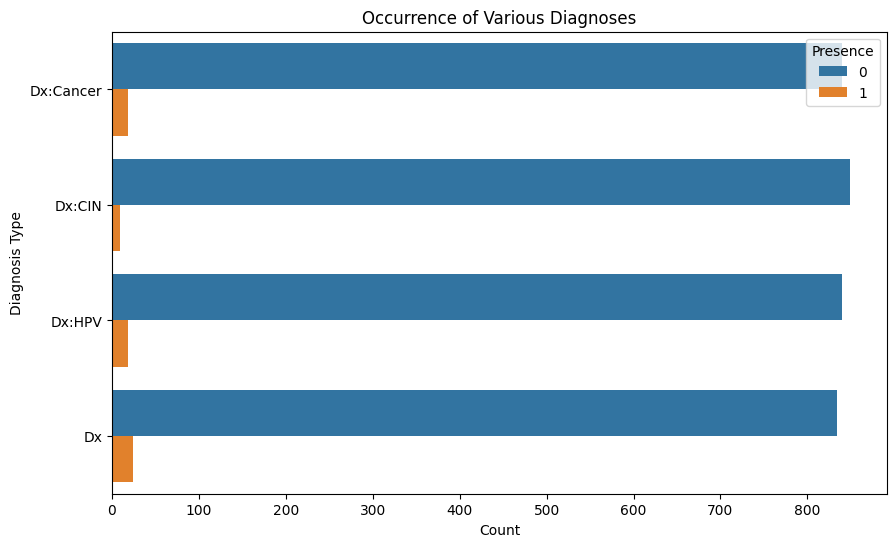

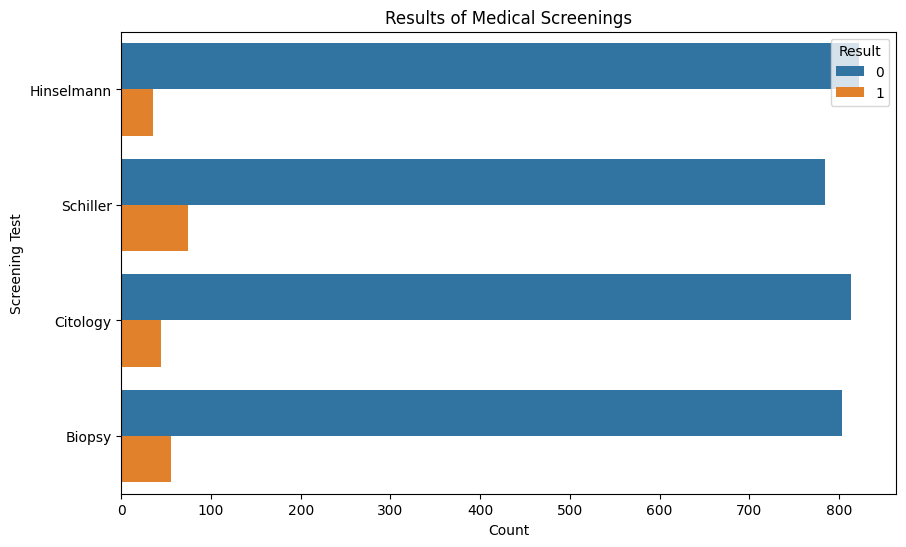

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CervicalCancerEDA:
    def __init__(self, df):
        self.df = df
        self.df.replace("?", pd.NA, inplace=True)  # Convert "?" to NaN

    def age_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['Age'].dropna(), kde=True, bins=20)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()

    def sexual_partners_vs_age(self):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=self.df['Age'], y=self.df['Number of sexual partners'].dropna())
        plt.title('Number of Sexual Partners vs. Age')
        plt.xlabel('Age')
        plt.ylabel('Number of Sexual Partners')
        plt.show()


    def smoking_status(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Smokes', data=self.df)
        plt.title('Smoking Status')
        plt.xlabel('Smokes')
        plt.ylabel('Count')
        plt.show()


    def hormonal_contraceptives_usage(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Hormonal Contraceptives', data=self.df)
        plt.title('Hormonal Contraceptives Usage')
        plt.xlabel('Hormonal Contraceptives')
        plt.ylabel('Count')
        plt.show()

    def iud_usage(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='IUD', data=self.df)
        plt.title('IUD Usage')
        plt.xlabel('IUD')
        plt.ylabel('Count')
        plt.show()

    def stds_prevalence(self):
        plt.figure(figsize=(10, 6))
        stds_columns = ['STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                        'STDs:HPV']
        df_stds = self.df[stds_columns].melt(var_name='STD Type', value_name='Presence')
        sns.countplot(y='STD Type', hue='Presence', data=df_stds)
        plt.title('Prevalence of Different Types of STDs')
        plt.xlabel('Count')
        plt.ylabel('STD Type')
        plt.show()

    def stds_correlation_heatmap(self):
        plt.figure(figsize=(12, 8))
        stds_columns = ['STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                        'STDs:HPV']
        sns.heatmap(self.df[stds_columns].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Between Different STDs')
        plt.show()

    def diagnosis_types(self):
        plt.figure(figsize=(10, 6))
        diagnosis_columns = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']
        df_diag = self.df[diagnosis_columns].melt(var_name='Diagnosis Type', value_name='Presence')
        sns.countplot(y='Diagnosis Type', hue='Presence', data=df_diag)
        plt.title('Occurrence of Various Diagnoses')
        plt.xlabel('Count')
        plt.ylabel('Diagnosis Type')
        plt.show()

    def medical_screening_results(self):
        plt.figure(figsize=(10, 6))
        screening_columns = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
        df_screening = self.df[screening_columns].melt(var_name='Screening Test', value_name='Result')
        sns.countplot(y='Screening Test', hue='Result', data=df_screening)
        plt.title('Results of Medical Screenings')
        plt.xlabel('Count')
        plt.ylabel('Screening Test')
        plt.show()


# Example of usage
if __name__ == "__main__":
    eda = CervicalCancerEDA(df)

    # Call functions as needed
    eda.age_distribution()
    eda.sexual_partners_vs_age()
    eda.smoking_status()
    eda.hormonal_contraceptives_usage()
    eda.iud_usage()
    eda.stds_prevalence()
    eda.stds_correlation_heatmap()
    eda.diagnosis_types()
    eda.medical_screening_results()


In [ ]:
#4. A function that takes a set of predictions and true values that validates the predictions using appropriate metrics.

Model Accuracy: 0.9006211180124224
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       179
         1.0       0.82      0.99      0.90       143

    accuracy                           0.90       322
   macro avg       0.91      0.91      0.90       322
weighted avg       0.91      0.90      0.90       322



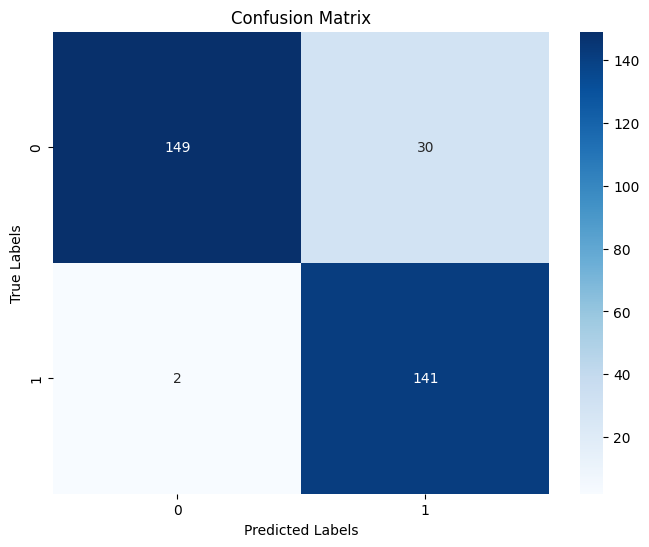

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains the given model on the training data, evaluates it on the test data,
    and returns the model's predictions along with evaluation metrics.

    Parameters:
    - model: The model to be trained (e.g., KNeighborsClassifier).
    - X_train: Training features.
    - X_test: Testing features.
    - y_train: Training labels.
    - y_test: Testing labels.

    Returns:
    - y_pred: The model's predictions on the test data.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    print("Model Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return y_pred


target_df = cancer_data['Biopsy']
input_df = cancer_data.drop(columns=['Biopsy'])
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
y_pred = train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test)

In [ ]:
#5. Anything else you feel is necessary for modelling or improving the performance of your model.

- Identifying and selecting the most relevant features for the model. Techniques like Recursive Feature Elimination (RFE) or feature importance from models like RandomForest can help.
- Normalization/Standardization and handling the missing values cAN enhance performance.
- Using techniques like Grid Search or Random Search to find the best hyperparameters can be used. Libraries like scikit-learn offer GridSearchCV and RandomizedSearchCV for this purpose, also advanced optimization methods with libraries like Optuna
- Using k-fold cross-validation to evaluate the model’s performance more robustly. This helps in assessing how the model generalizes to unseen data.
- Techniques like SMOTE (Synthetic Minority Over-sampling Technique)or using class weights in the model can help to balance the data.
- Using a variety of metrics to evaluate the model. Metrics such as Precision, Recall, F1-score, and ROC-AUC can provide more insights than accuracy alone.

Model Accuracy: 0.9006211180124224
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       179
         1.0       0.82      0.99      0.90       143

    accuracy                           0.90       322
   macro avg       0.91      0.91      0.90       322
weighted avg       0.91      0.90      0.90       322



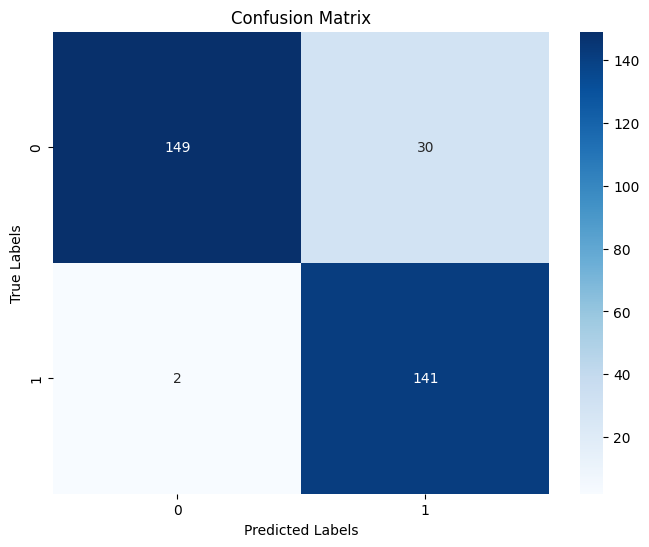

Model Accuracy: 0.9472049689440993
Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       179
         1.0       0.90      0.99      0.94       143

    accuracy                           0.95       322
   macro avg       0.95      0.95      0.95       322
weighted avg       0.95      0.95      0.95       322



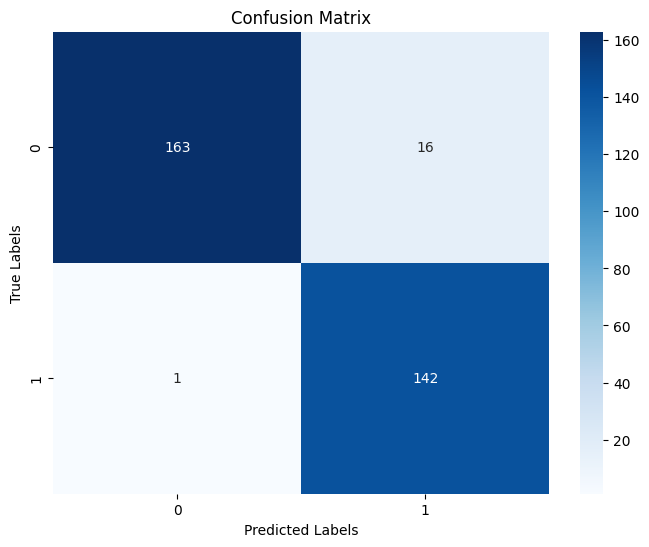

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [79]:
#Eg
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Normal
knn_model = KNeighborsClassifier(n_neighbors=5)
y_pred = train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test)
#With Best Param
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
train_and_evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)

END